In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)


In [4]:
df=pd.read_csv("genai_user_behavior_2025.csv",parse_dates=['session_start', 'session_end', 'signup_date'])

In [5]:
df['session_duration_min'] = (df['session_end'] - df['session_start']).dt.total_seconds() / 60


Daily Active Users (DAU)


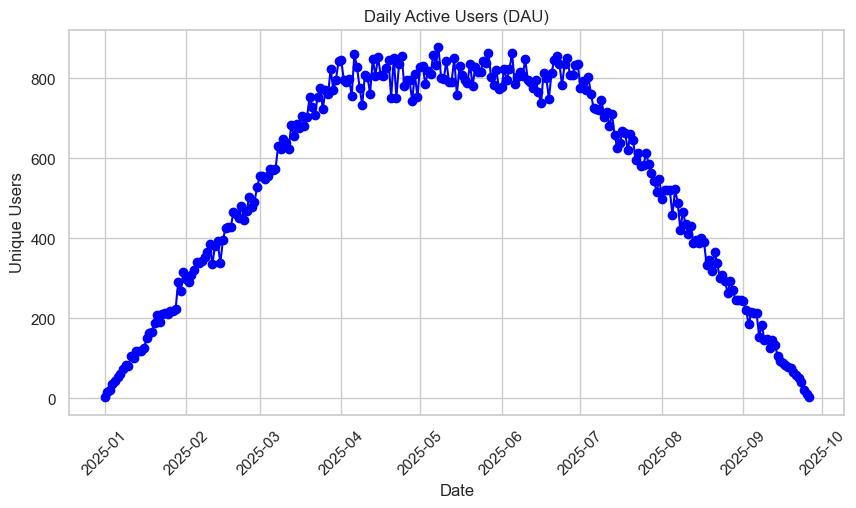

In [6]:
dau = df.groupby(df['session_start'].dt.date)['user_id'].nunique().reset_index()
dau.columns = ['date', 'DAU']
plt.plot(dau['date'], dau['DAU'], marker='o', color='blue')
plt.title('Daily Active Users (DAU)')
plt.xlabel('Date')
plt.ylabel('Unique Users')
plt.xticks(rotation=45)
plt.savefig('DAU.png')
plt.show()

Weekly Active Users (WAU)


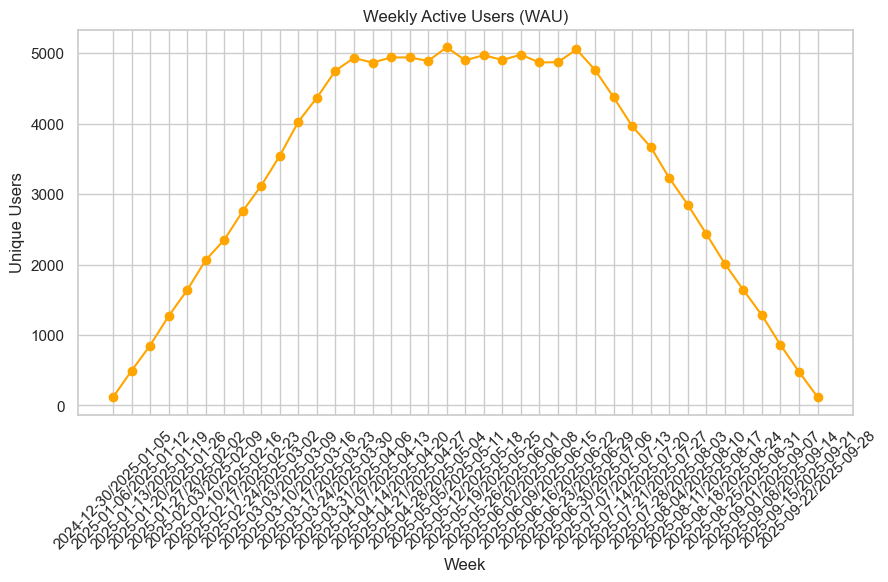

In [7]:
wau = df.groupby(df['session_start'].dt.to_period('W'))['user_id'].nunique().reset_index()
wau.columns = ['week', 'WAU']
plt.plot(wau['week'].astype(str), wau['WAU'], marker='o', color='orange')
plt.title('Weekly Active Users (WAU)')
plt.xlabel('Week')
plt.ylabel('Unique Users')
plt.xticks(rotation=45)
plt.savefig('WAU.png')
plt.show()

Monthly Active Users (MAU)

C:\Users\tchau\AppData\Local\Temp\ipykernel_17928\424776052.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='MAU', data=mau, palette='Blues_d')


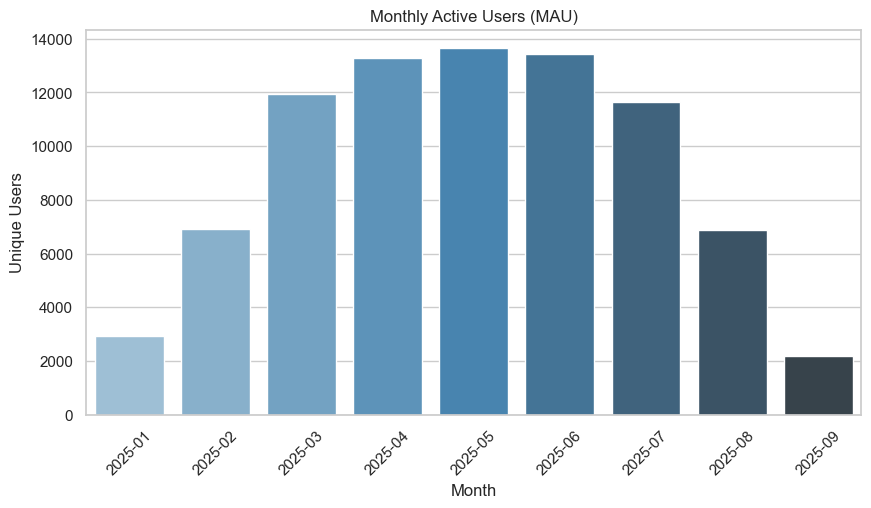

In [8]:
mau = df.groupby(df['session_start'].dt.to_period('M'))['user_id'].nunique().reset_index()
mau.columns = ['month', 'MAU']
sns.barplot(x='month', y='MAU', data=mau, palette='Blues_d')
plt.title('Monthly Active Users (MAU)')
plt.xlabel('Month')
plt.ylabel('Unique Users')
plt.xticks(rotation=45)
plt.savefig('MAU.png')
plt.show()

CHURN & RETENTION ANALYSIS

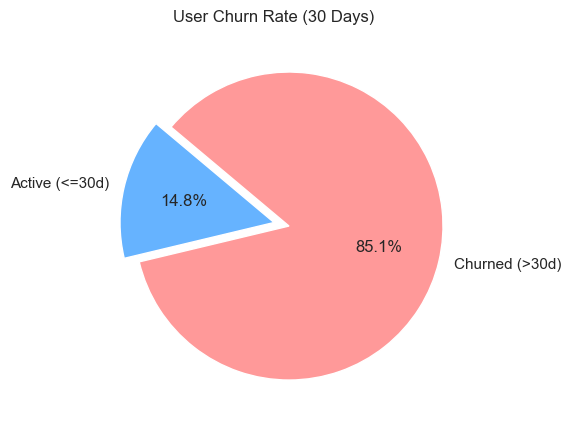

In [9]:
latest_session = df.groupby('user_id')['session_start'].max().reset_index()
latest_session['days_since_last_session'] = (df['session_start'].max() - latest_session['session_start']).dt.days
churned_users = (latest_session['days_since_last_session'] > 30).sum()
active_users = len(latest_session) - churned_users
labels = ['Active (<=30d)', 'Churned (>30d)']
sizes = [active_users, churned_users]
colors = ['#66b3ff', '#ff9999']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0, 0.1))
plt.title('User Churn Rate (30 Days)')
plt.savefig('User churn rate.png')
plt.show()

C:\Users\tchau\AppData\Local\Temp\ipykernel_17928\689471581.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Sessions', data=feature_usage, palette='Set2')


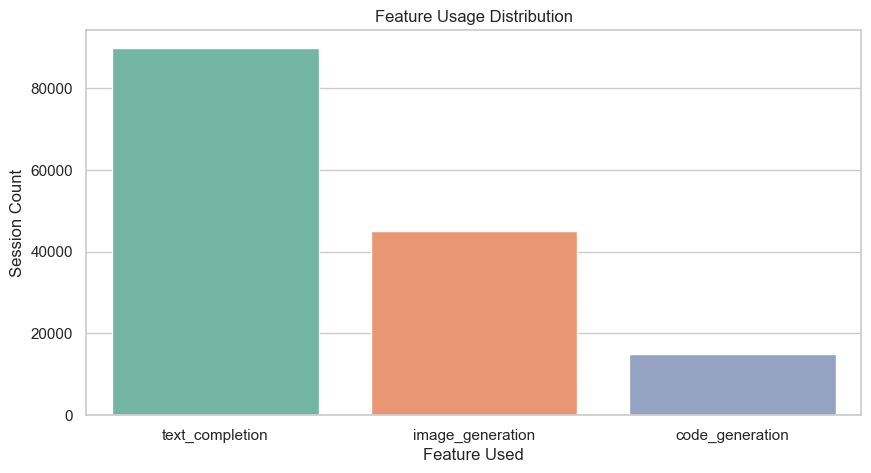

In [10]:
feature_usage = df['feature_used'].value_counts().reset_index()
feature_usage.columns = ['Feature', 'Sessions']
sns.barplot(x='Feature', y='Sessions', data=feature_usage, palette='Set2')
plt.title('Feature Usage Distribution')
plt.xlabel('Feature Used')
plt.ylabel('Session Count')
plt.savefig('feature usage.png')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\tchau\\OneDrive\\Desktop\\gen AI tool user behaviour\\Free v\\s Paid users.png'

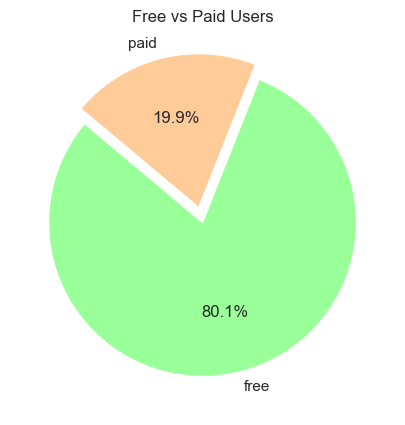

In [11]:
user_type_counts = df['user_type'].value_counts()
plt.pie(user_type_counts, labels=user_type_counts.index, autopct='%1.1f%%',
        startangle=140, colors=['#99ff99', '#ffcc99'], explode=(0, 0.1))
plt.title('Free vs Paid Users')
plt.savefig('Free v/s Paid users.png')
plt.show()

In [38]:
avg_session_duration = df['session_duration_min'].mean()
avg_prompts_per_session = df['prompts'].mean()
free_to_paid_ratio = (user_type_counts['paid'] / user_type_counts.sum()) * 100

key_insights = {
    'Average Session Duration (min)': round(avg_session_duration, 2),
    'Average Prompts per Session': round(avg_prompts_per_session, 2),
    'Churn Rate (30 days)': f"{(churned_users / len(latest_session)) * 100:.2f}%",
    'Free-to-Paid Conversion Rate': f"{free_to_paid_ratio:.2f}%"
}
key_insights

{'Average Session Duration (min)': 32.04,
 'Average Prompts per Session': 10.01,
 'Churn Rate (30 days)': '85.15%',
 'Free-to-Paid Conversion Rate': '19.89%'}